<b>LET'S GROW MORE : DATA SCIENCE VIRTUAL INTERNSHIP PROGRAM

<B>BATCH : AUGUST 2021

<B>AUTHOR : ALEENA VADAKKEDATHU SHAJAN

<B>TASK 02 : Stock Market Prediction And Forecasting Using Stacked LSTM

<b>IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler as msc

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

<b>LOADING,READING AND ANALYZING THE DATASET

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


<B>FEATURE EXPLORATION

In [3]:
data.shape

(2035, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<b>DATA VISUALIZATION

<AxesSubplot:xlabel='Total Trade Quantity', ylabel='Turnover (Lacs)'>

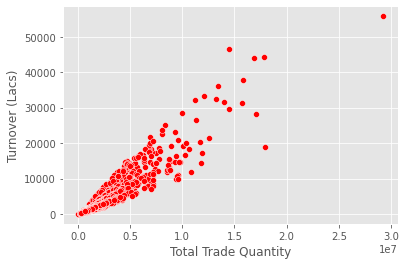

In [6]:
style.use("ggplot")
sns.scatterplot(x="Total Trade Quantity" , y="Turnover (Lacs)", data=data ,color="red")

In [7]:
train=data.iloc[:, 1:2].values
train

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [8]:
scaler = msc(feature_range = (0, 1))
train_new = scaler.fit_transform(train)
train_new

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [9]:
X_train = []
y_train = []
for x in range(60, 2035):
    X_train.append(train_new[x-60:x, 0])
    y_train.append(train_new[x, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
#Making RNN sequential layer 
reg = Sequential()

#Adding the first LSTM layerand performing some dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

#Adding the second LSTM layerand performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

#Adding the third LSTM layer and performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

#Adding the fourth LSTM layer and performing some dropout
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

In [12]:
#Fitting and training the data
reg.add(Dense(units = 1))

reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 28s 152ms/step - loss: 0.0095
Epoch 2/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0037
Epoch 3/100
62/62 [==============================] - 9s 145ms/step - loss: 0.0032
Epoch 4/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 8s 136ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0025
Epoch 7/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 9s 145ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 9s 138ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0018
Epoch 13/100

62/62 [==============================] - 7s 121ms/step - loss: 6.0915e-04
Epoch 97/100
62/62 [==============================] - 9s 142ms/step - loss: 7.9745e-04
Epoch 98/100
62/62 [==============================] - 7s 120ms/step - loss: 5.9587e-04
Epoch 99/100
62/62 [==============================] - 8s 134ms/step - loss: 5.5523e-04
Epoch 100/100
62/62 [==============================] - 7s 117ms/step - loss: 5.9108e-04


In [13]:
# Getting the real stock price
data_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
rsp = data_test.iloc[:, 1:2].values
rsp

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [14]:
# Getting the predicted stock price
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
input = data_total[len(data_total) - len(data_test) - 60:].values
input = input.reshape(-1,1)
input = scaler.transform(input)
X_test = []

for i in range(60, 76):
    X_test.append(input[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
psp = reg.predict(X_test)

psp = scaler.inverse_transform(psp)

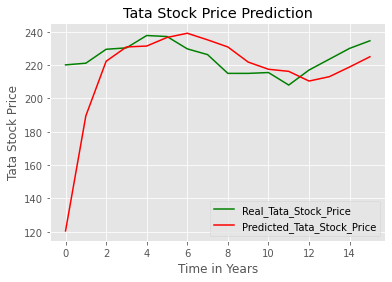

In [15]:
#Plotting
plt.plot(rsp, color = 'green',label = 'Real_Tata_Stock_Price')
plt.plot(psp, color = 'red',label = 'Predicted_Tata_Stock_Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time in Years')
plt.ylabel('Tata Stock Price')
plt.legend()
plt.show()

<b>CONCLUSION

<b>1.The particular dataset consists of 2035 observations and 8 variables.

<b>2.The data visualization of stock market graph depicts that the stock price of real tata stock didn't have much increase whereas,the predicted tata stock price had a high rise over the years. 